In [1]:
from gp_crypto_next import dataload, oi_dataload
from gp_crypto_next.dataload import DataFrequency
import matplotlib.pyplot as plt
import numpy as np

start_date = '2025-01-01'
end_date = '2025-12-01'
read_frequency = DataFrequency.MONTHLY
daily_frequency = DataFrequency.DAILY
dir = '/Users/aming/data/ETHUSDT/15m'
symbol = 'ETHUSDT'
timeframe = '15m'

In [2]:
df = dataload.data_load_v2(sym = symbol, data_dir=dir, start_date=start_date, end_date=end_date,
                    timeframe=timeframe, file_path=None)


✓ 成功读取 feather: ETHUSDT-15m-2025-01.feather, 行数: 2976
✓ 成功读取 feather: ETHUSDT-15m-2025-02.feather, 行数: 2688
✓ 成功读取 feather: ETHUSDT-15m-2025-03.feather, 行数: 2976
✓ 成功读取 feather: ETHUSDT-15m-2025-04.feather, 行数: 2880
✓ 成功读取 feather: ETHUSDT-15m-2025-05.feather, 行数: 2976
✓ 成功读取 feather: ETHUSDT-15m-2025-06.feather, 行数: 2880
✓ 成功读取 feather: ETHUSDT-15m-2025-07.feather, 行数: 2976
✓ 成功读取 feather: ETHUSDT-15m-2025-08.feather, 行数: 2976
✓ 成功读取 feather: ETHUSDT-15m-2025-09.feather, 行数: 2880
✓ 成功读取 feather: ETHUSDT-15m-2025-10.feather, 行数: 2976
✓ 成功读取 feather: ETHUSDT-15m-2025-11.feather, 行数: 2880
✓ 成功读取 feather: ETHUSDT-15m-2025-12.feather, 行数: 2976

读取完成: 成功 12 个，失败 0 个

合并后总行数: 35,040
数据时间范围: 2025-01-01 00:00:00 至 2025-12-31 23:45:00



【统计特征】
峰度 (Kurtosis): 35.24 (正态分布=0, >3 说明极度尖峰厚尾)
偏度 (Skewness): -0.08 (负数说明暴跌概率 > 暴涨概率)
标准差 (Volatility): 0.3848%


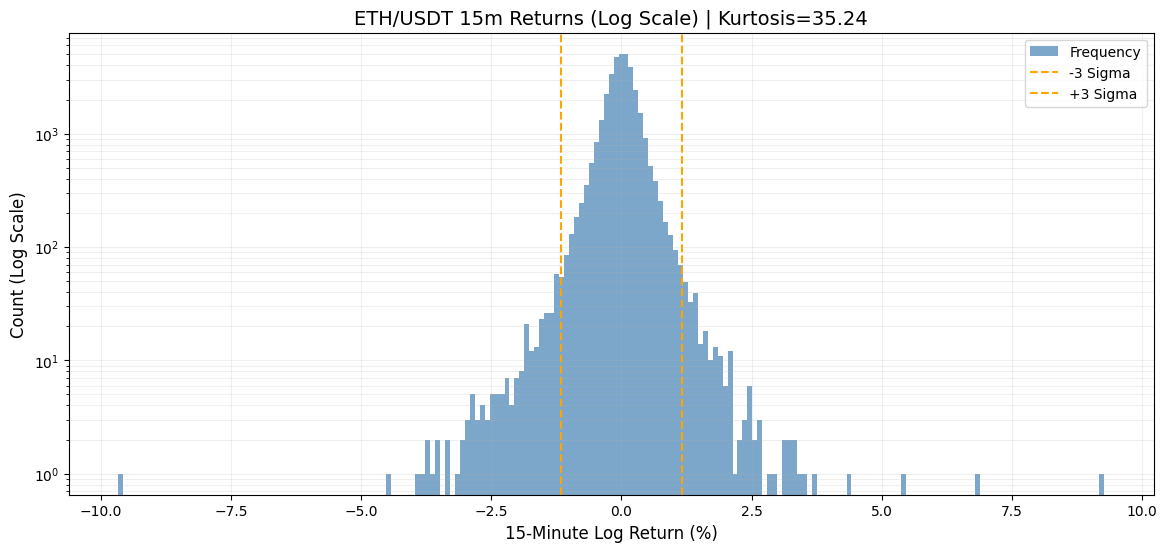

【厚尾验证】
理论正态分布 >3σ 概率: 0.27%
实际数据 >3σ 占比: 1.51%
结论: 实际极端风险是理论值的 5.6 倍


In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# import pandas as pd
# from scipy.stats import kurtosis, skew

# # 假设 df 已经有了 'c' (Close) 列
# # 1. 使用对数收益率 (Log Return) - 统计学性质更佳
# df['ret_log_1'] = np.log(df['c'] / df['c'].shift(1)) * 100
# df = df.dropna()

# # 2. 计算关键统计量
# k_val = kurtosis(df['ret_log_1']) # 峰度
# s_val = skew(df['ret_log_1'])     # 偏度
# std_val = df['ret_log_1'].std()   # 标准差

# print(f"【统计特征】")
# print(f"峰度 (Kurtosis): {k_val:.2f} (正态分布=0, >3 说明极度尖峰厚尾)")
# print(f"偏度 (Skewness): {s_val:.2f} (负数说明暴跌概率 > 暴涨概率)")
# print(f"标准差 (Volatility): {std_val:.4f}%")

# # 3. 绘图：双重视角
# fig, ax = plt.subplots(figsize=(14, 6))

# # 设置分箱：自适应范围，覆盖最大最小值
# bins_range = np.linspace(df['ret_log_1'].min(), df['ret_log_1'].max(), 200)

# n, bins, patches = ax.hist(df['ret_log_1'], 
#                            bins=bins_range, 
#                            color='steelblue', 
#                            edgecolor='none', 
#                            alpha=0.7,
#                            label='Frequency')

# # --- 关键改进点：开启对数纵坐标 ---
# # 这能让你看清那些原本贴在地板上的“尾部数据”
# ax.set_yscale('log') 
# ax.set_ylabel('Count (Log Scale)', fontsize=12)
# ax.set_xlabel('15-Minute Log Return (%)', fontsize=12)

# # 标注 Sigma 线 (而不是硬编码的 10%)
# # 标注 +/- 3倍标准差的位置 (通常视为极端值的开始)
# plt.axvline(x=-3*std_val, color='orange', linestyle='--', label='-3 Sigma')
# plt.axvline(x=3*std_val, color='orange', linestyle='--', label='+3 Sigma')

# # 图表美化
# plt.title(f'ETH/USDT 15m Returns (Log Scale) | Kurtosis={k_val:.2f}', fontsize=14)
# plt.legend()
# plt.grid(True, which="both", ls="-", alpha=0.2) # Grid 也要适应 Log 轴

# plt.show()

# # 4. 基于 Sigma 的厚尾验证
# # 统计超过 3个标准差的概率（正态分布下理论值应为 0.27%）
# extreme_3sigma = df[(df['ret_log_1'] < -3*std_val) | (df['ret_log_1'] > 3*std_val)]
# real_prob = len(extreme_3sigma) / len(df) * 100
# normal_prob = 0.27 

# print(f"【厚尾验证】")
# print(f"理论正态分布 >3σ 概率: {normal_prob}%")
# print(f"实际数据 >3σ 占比: {real_prob:.2f}%")
# print(f"结论: 实际极端风险是理论值的 {real_prob/normal_prob:.1f} 倍")

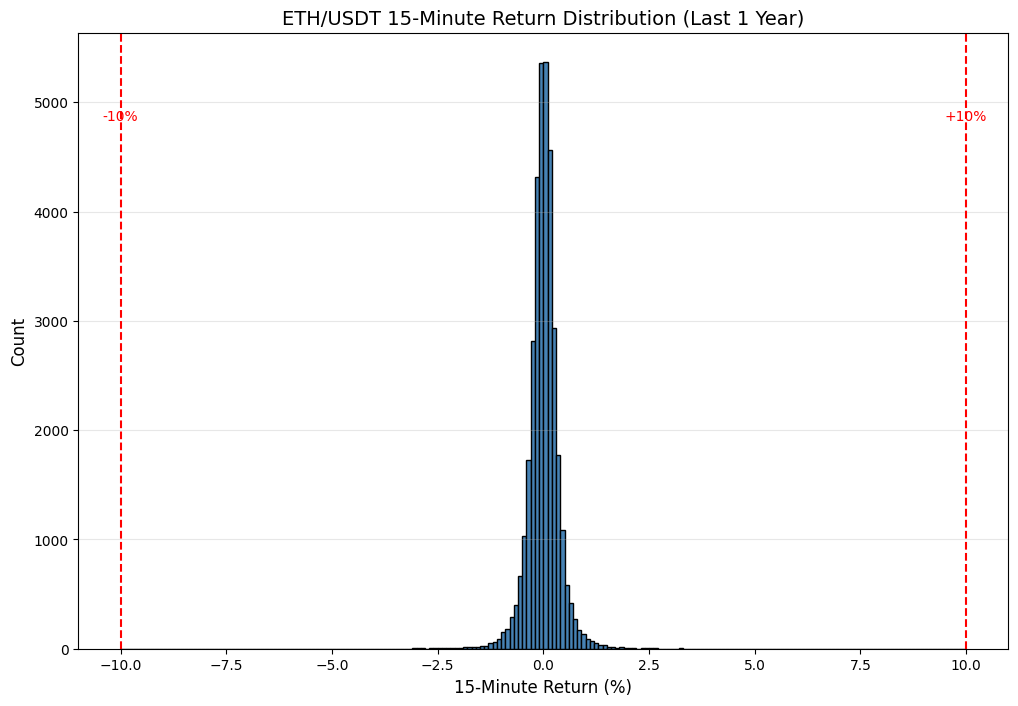

15分钟极端涨跌幅（超出±1%）占比: 2.26%


In [ ]:
# 涨跌幅公式：(当前收盘价 - 上一期收盘价) / 上一期收盘价 * 100%
df['prev_1'] = df['c'].shift(1)  # 获取上一个15分钟的收盘价

df['ret_1'] = (df['c'] - df['prev_1']) / df['prev_1'] * 100  # 手动计算涨跌幅
# df['ret_8'] = (df['c'] - df['prev_8']) / df['prev_8'] * 100  # 手动计算涨跌幅

df = df.dropna()  # 去除第一个空值（因为shift(1)会让第一行的prev_close为NaN）

plt.figure(figsize=(12, 8))
n, bins, patches = plt.hist(df['ret_1'], 
                           bins=np.arange(-10, 10.1, 0.1),  # 横轴-10%到10%，步长0.1%
                           color='steelblue', 
                           edgecolor='black')

# 标注-10%和+10%的位置
plt.axvline(x=-10, color='red', linestyle='--')
plt.text(-10, max(n)*0.9, '-10%', color='red', ha='center')
plt.axvline(x=10, color='red', linestyle='--')
plt.text(10, max(n)*0.9, '+10%', color='red', ha='center')

# 图表美化
plt.title('ETH/USDT 15-Minute Return Distribution (Last 1 Year)', fontsize=14)
plt.xlabel('15-Minute Return (%)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xlim(-11, 11)
plt.grid(axis='y', alpha=0.3)

plt.show()

# ----------------------
# 4. 厚尾特征验证
# ----------------------
extreme_returns = df[(df['ret_1'] < -1) | (df['ret_1'] > 1)]
extreme_ratio = len(extreme_returns) / len(df) * 100
print(f"15分钟极端涨跌幅（超出±1%）占比: {extreme_ratio:.2f}%")